<a href="https://colab.research.google.com/github/kotekjedi/GANs-ITMO-2022-Masters/blob/main/Assignment%201/1_gan_dcgan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generative Models
***

**ITMO University, Autumn 2022, MSc course**


## Assignment 2

***


*Authored by Arip Asadulaev & Manh Lab*

*Adapted by Alexander Panfilov*

***


Let's continue our dive into the classical generative models! Today's goal is to implement Conditional GAN for the MNIST dataset. There will be no particular instructions how to do it (just a few checkpoints) - feel free to rewrite this skeleton or reuse your code from the previous assignment.

Good luck!

## 1. Conditional GAN
*Source: <a href="https://arxiv.org/pdf/1411.1784.pdf" target="_blank">Mirza, Mehdi, and Simon Osindero. "Conditional generative adversarial nets." arXiv preprint arXiv:1411.1784 (2014)</a>.*

### Imports

In [ ]:
import os

import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from IPython.display import Image
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import Compose, Normalize, ToTensor
from torchvision.utils import save_image

%matplotlib inline
plt.style.use("ggplot")

### Some parameters

In [ ]:
hidden_size = 256
batch_size = 100
LR = 0.0002
num_epochs = 300
latent_size = 64  # input random input vector latent
image_size = 784  # 28*28 flatten
device = "cuda" if torch.cuda.is_available() else "cpu"
number_class = 10

if device == "cuda":
    !nvidia-smi

sample_dir = "./images"
if not os.path.exists(sample_dir):
    os.makedirs(sample_dir)

### Load dataset and create dataloader

In [ ]:
# Your code here!

# mnist = MNIST(...) # don't forget to normalize data

# dataloader = ...

In [11]:
def denorm(x):
    out = (x + 1) / 2
    return out.clamp(0, 1)

Label: 5


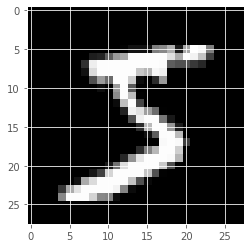

In [13]:
# Let's plot something

img, label = mnist[0]
print("Label: ", label)

img_norm = denorm(img)
plt.imshow(img_norm[0], cmap="gray")
print("Label:", label)

### Define the models

Define the Discriminator network, the Generator network with additional input for condition

In [34]:
class Generator(nn.Module):
    def __init__(self, ...): # you may find useful to pass number_class and use nn.Embedding here
        # Architecture suggestion: linear1 - relu - linear2 - relu - linear3 - tanh

            # Your code here!

    def forward(self, ...): # you may find useful to pass label here

            # Your code here!

        return x


class Discriminator(nn.Module):
    def __init__(self, ...): # you may find useful to pass number_class and use nn.Embedding here
        # Architecture suggestion: linear1 - leaky_relu - linear2 - leaky_relu - linear3 - sigmoid

            # Your code here!

    def forward(self, ...):

            # Your code here!

        return x

In [35]:
# G = Generator(...)
# D = Discriminator(...)

In [38]:
# Let's define loss and optimizers

criterion = nn.BCELoss()
d_optimizer = torch.optim.Adam(D.parameters(), lr=LR)
g_optimizer = torch.optim.Adam(G.parameters(), lr=LR)

### Discriminator Training

In [39]:
def reset_grad():
    d_optimizer.zero_grad()
    g_optimizer.zero_grad()


def train_discriminator(images, class):

    # Loss for real images

        # Your code here!

    # Loss for fake images

        # Your code here!

    # Combine losses

        # Your code here!

    # Reset gradients
    reset_grad()

    # Compute gradients

        # Your code here!

    # Adjust the parameters using backprop
    d_optimizer.step()

    return d_loss, real_score, fake_score

### Generator Training

In [40]:
def train_generator():
    # Generate fake images and calculate loss

        # Your code here!

    # Backprop and optimize
    reset_grad()

        # Your code here!

    return g_loss, fake_images

### Start the training proccess

In [41]:
def save_fake_images(index):
    # sample several (e.g. batch_size) random vectors and random class numbers for the generator

        # Your code here!

    # generate fake image

    # fake_images = ...

    # save images
    fake_name = "fake_images-{0:0=4d}.png".format(index)
    print("Saving", fake_name)
    save_image(denorm(fake_images), os.path.join(sample_dir, fake_name), nrow=10)

In [ ]:
%%time
total_step = len(data_loader)
d_losses, g_losses, real_scores, fake_scores = [], [], [], []
G.to(device)
D.to(device)
for epoch in range(num_epochs):
    for i, (images, digit) in enumerate(data_loader):
        # Load a batch & transform to vectors

            # Your code here!

        # Train the discriminator and generator

            # Your code here!

        # Inspect the losses
        if (i + 1) % 200 == 0:
            d_losses.append(d_loss.item())
            g_losses.append(g_loss.item())
            real_scores.append(real_score.mean().item())
            fake_scores.append(fake_score.mean().item())
            print(
                "Epoch [{}/{}], Step [{}/{}], d_loss: {:.4f}, g_loss: {:.4f}, D(x): {:.2f}, D(G(z)): {:.2f}".format(
                    epoch,
                    num_epochs,
                    i + 1,
                    total_step,
                    d_loss.item(),
                    g_loss.item(),
                    real_score.mean().item(),
                    fake_score.mean().item(),
                )
            )
    # Sample and save images
    save_fake_images(epoch + 1)

### Show your conditional generation results for every class